In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import gaussian_kde
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC

import sys
sys.version

'3.5.2 (default, Oct 11 2016, 04:59:56) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]'

# Load data

In [2]:
train = pd.read_csv('train.csv')
train.set_index('id', inplace=True)
train['log_loss'] = np.log10(train.loss)

cont = [c for c in train if 'cont' in c]
cat = [c for c in train if 'cat' in c]
var = cat + cont

test = pd.read_csv('test.csv')
test.set_index('id', inplace=True)
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


# EDA

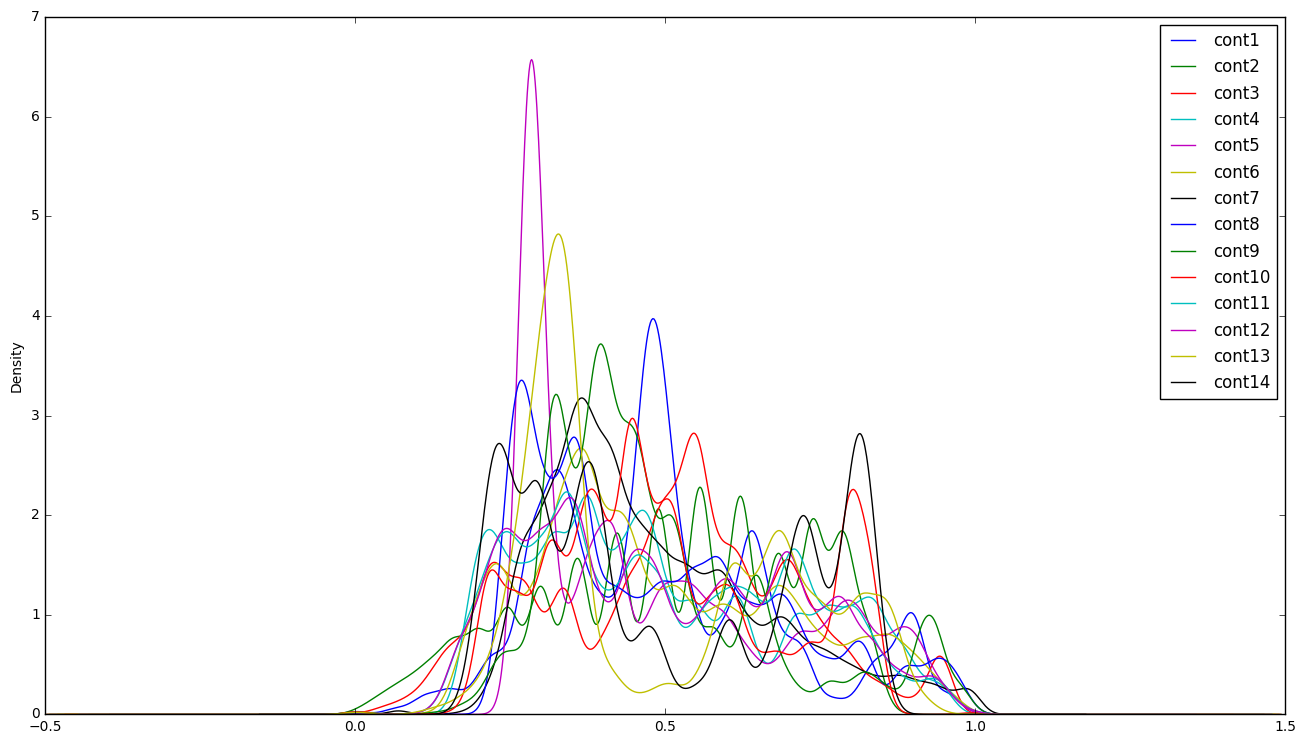

In [45]:
test.plot(y=cont, kind='kde', figsize=[16,9])

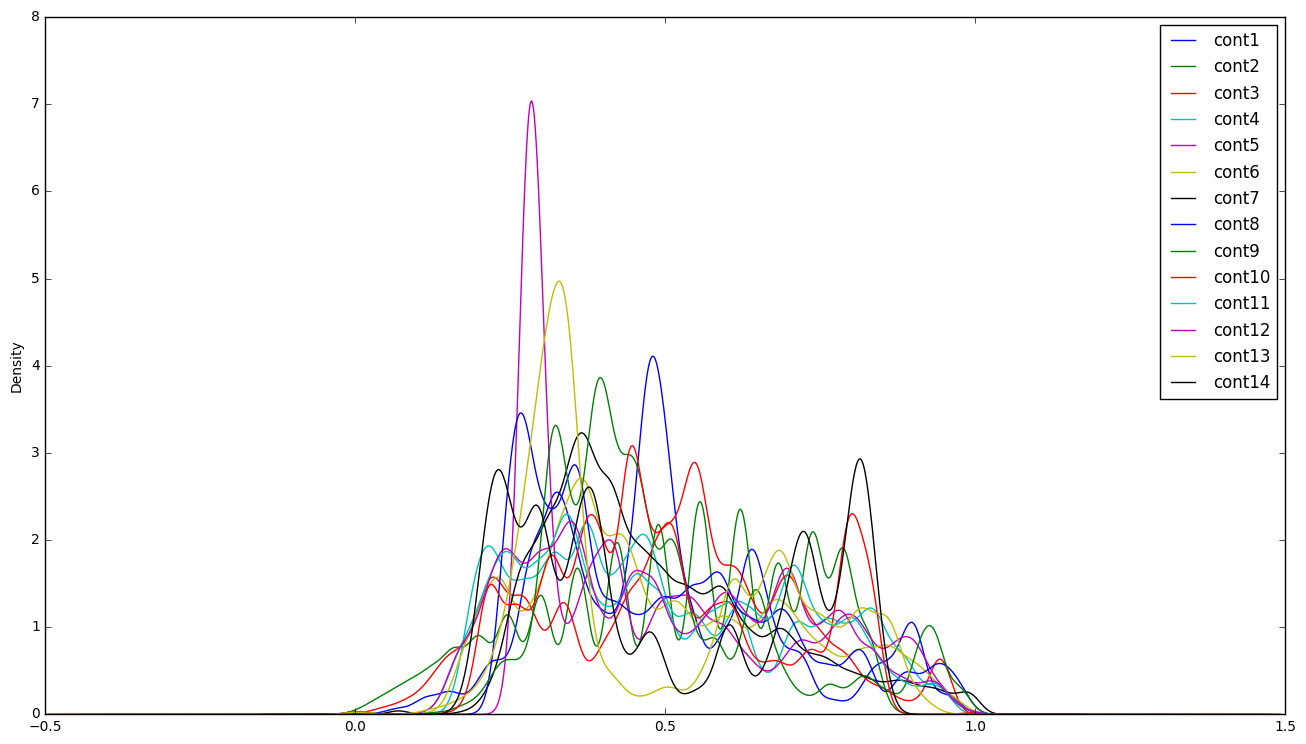

In [46]:
train.plot(y=cont, kind='kde', figsize=[16,9])

# Overlay of KDE from continue variables

In [3]:
# for c in cont:        
#     d1 = gaussian_kde(train[c])
#     d2 = gaussian_kde(test[c])
#     xs = np.linspace(-0.5,1.5,200)
#     # density.covariance_factor = lambda : .25
#     # density._compute_covariance()
#     plt.figure()
#     plt.plot(xs,d1(xs))
#     plt.plot(xs,d2(xs))
#     plt.legend(['train','test'])
#     plt.title(c)
#     plt.show()

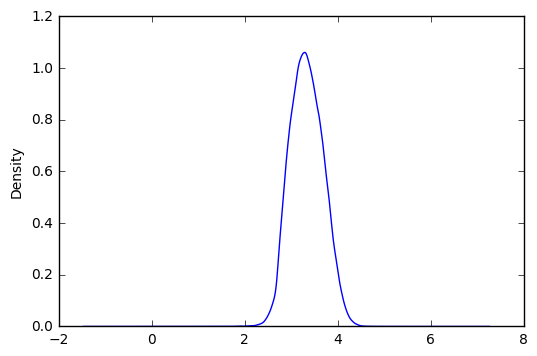

In [283]:
train.log_loss[lambda x:x>0].plot(kind='kde')
# df2.plot(x='log_loss', y='cont1', style='.', kind='scatter')

In [81]:
# for c in df.columns.values:
#     if 'cont' in c: df.hist(c, bins=30)
# df.plot(y='cont1', kind='kde')


In [98]:
# sorted(cat_space['cat116'])
train[['log_loss']+cont].describe()
# test[cont].describe()

,log_loss,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,3.337669,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.352590,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,-0.173925,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,3.080792,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,3.325427,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,3.587042,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,5.082829,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


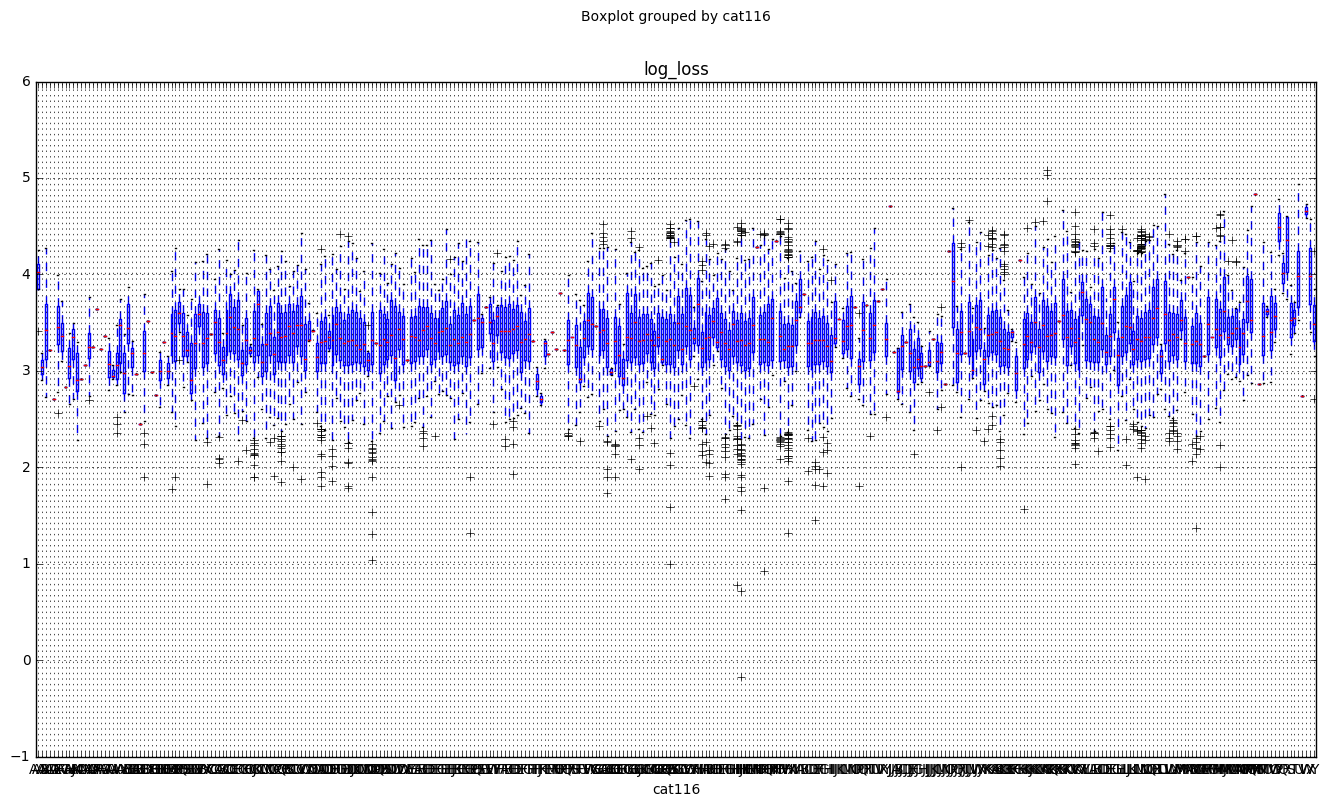

In [135]:
df.boxplot('log_loss', by='cat116',figsize=[16,9])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132f7fb70>]], dtype=object)

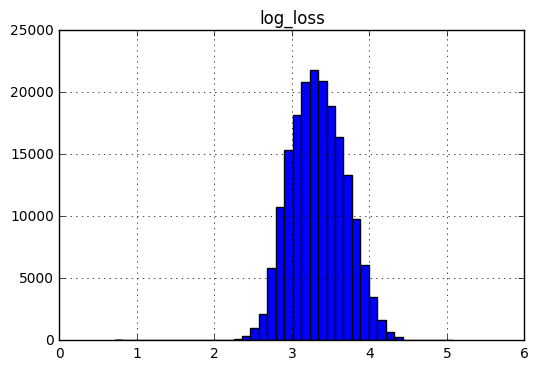

In [111]:
# plt.hist(df.loss[lambda x:x<20000], bins=20)
# a = plt.hist(np.log10(df.loss[lambda x:x>1]), bins=40)
df2.hist('log_loss', bins=40)

In [60]:

# df2 = train[lambda x:x.log_loss>0]
# for c in df.columns.values:
#     if int(c[3:])>10: break
#     if 'cat' in c: df2.boxplot('log_loss', by=c)
    

# Scale Encoding

In [3]:
cat_space = {c:dict(s.value_counts()) for c,s in train.items() if 'cat' in c}
test_space = {c:dict(s.value_counts()) for c,s in test.items() if 'cat' in c}
for k,v in test_space.items():
    cat_space[k].update(v)
cat_size = {k:len(v) for k,v in cat_space.items()}

In [4]:
encoder = {cat:{v[0]:k/(cat_size[cat]-1) 
               for k,v in enumerate(sorted(sp.items(), key=lambda x:'0'+x[0] if len(x[0])==1 else x[0]))}
               for cat, sp in cat_space.items()}

# no normlization - for one-hot encode
# encoder = {cat:{v[0]:k
#                for k,v in enumerate(sorted(sp.items(), key=lambda x:'0'+x[0] if len(x[0])==1 else x[0]))}
#                for cat, sp in cat_space.items()}

In [6]:
train = train.apply(lambda x: x.map(lambda y: encoder[x.name][y]) if 'cat' in x.name else x)
test = test.apply(lambda x: x.map(lambda y: encoder[x.name][y]) if 'cat' in x.name else x)
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,3.345017
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,3.108430
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,3.477857
10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,2.973059
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,3.441514


In [59]:
X_train, X_test, y_train, y_test = train_test_split(train[var], train['log_loss'], test_size=0.15) #, random_state=0)
print('test data ', X_test.shape)
print('MAE of training data', np.mean(abs(y_train-y_train.mean())))

test data  (28248, 130)
MAE of training data 0.28655709712


# PCA

In [7]:
train['q10'] = pd.qcut(train.loss, 10, labels=False)

In [13]:
# train.head(10)
# plt.scatter(x=train.cont1, y=train.cont10)
pca = PCA(n_components=5)
ls = pca.fit_transform(train[var])


In [14]:
sum(pca.explained_variance_ratio_)

0.41127328909904781

In [22]:
train['ls1'] = ls[:,4]
train['ls2'] = ls[:,3]

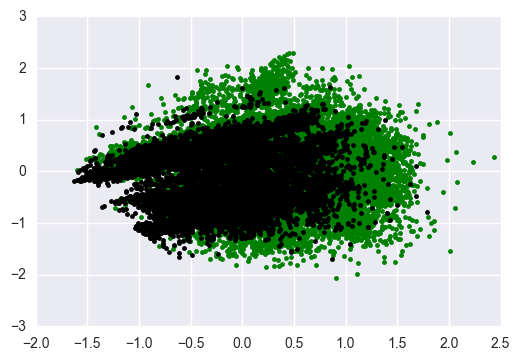

In [23]:
# sns.stripplot(x="ls1", y="ls2", data=train, hue="q10") #, size=2)
plt.figure()
grp = train.groupby('q10')
g0 = grp.get_group(0)
g1 = grp.get_group(9)
plt.plot(g1.ls1, g1.ls2, 'g.')
plt.plot(g0.ls1, g0.ls2, 'k.')


# SVM regressor

In [57]:
# svm_data = train[lambda x: x.any() ['q10'] in [0,9]]
# svm_data.head()
# svm_data = train[train.q10.map(lambda x:x in [0,9])]
# len(svm_data)
# svm_data = train[lambda x:np.logical_or( x.q10==0 , x.q10==9)]
# svm_data['svm'] = svm_data.q10.map(lambda x:-1 if x==0 else 1)
# svm_data.head()
# train['svm'] = train.q10.map(lambda x:x in [0,9])

# train['svm_y'] = train.q10.map(lambda x:1 if x==0 else (-1 if x==9 else 0))
# 
from sklearn.svm import SVC
clf = SVC()
clf.fit(train[lambda x:x.svm][var], train[lambda x:x.svm]['svm_y']) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
clf.score(train[lambda x:x.svm][var], train[lambda x:x.svm]['svm_y'])

0.94057986406117244

In [ ]:
sr = SVR(verbose=True)
sr.fit(X_train, y_train)

In [ ]:
y_pred = sr.predict(X_test)
err = abs(10**y_pred - 10**y_test)
print('MAE of SVR is %.3f' %np.mean(err))

# One-hot Encoding

In [117]:
cf = ['cat' in x for x in train[var]]
nv = list(zip(*sorted(cat_size.items(), key=lambda x:int(x[0][3:]))))[1]
enc = OneHotEncoder(categorical_features=cf, n_values=nv)
train_fea = enc.fit_transform(train[var])
test_fea = enc.transform(test)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(train_fea, train['log_loss'], test_size=0.2) 
X_test.shape

(37664, 1190)

# KNN - distance matrix

In [201]:
# brutal force implementation

def l1(a,b):
    return sum(abs(train.loc[a][var] - train.loc[b][var]))

def l2(a,b):
    return sum((train.loc[a][var] - train.loc[b][var])**2)

# kdist = {}
# idx = sorted(train.index.values)
# for i in range(len(idx)):
#     if i%10000==0: print('complete %d points' %i)
#     kdist[idx[i]] = {idx[j]:l1(idx[i], idx[j]) for j in range(i+1,len(idx))}   

In [237]:
neighbors = 15
nbrs = NearestNeighbors(n_neighbors=neighbors, p=2, n_jobs=-1).fit(X_train)
dist, idx = nbrs.kneighbors(X_test)
inv = 1/dist
norm = inv.sum(axis=1)
nbg = np.array([y_train.iloc[i].values for i in idx])
y_pred = 10**(np.sum(nbg*inv, axis=1)/norm)
print('MAE with %d neighbors is: %.3f' %(neighbors, np.mean(abs(y_pred - 10**y_test))))

MAE with 15 neighbors is: 1334.137


# Nearest neighbor regression

In [73]:
# scale encode
neighbors = 10
knn = KNeighborsRegressor(n_neighbors=neighbors, weights='distance', p=2, algorithm='ball_tree', leaf_size=35, n_jobs=-1)
y_pred = knn.fit(X_train, y_train).predict(X_test)
abs_err = abs(10**y_pred - 10**y_test)
print('MAE with %d neighbors is: %.3f' %(neighbors, np.mean(abs_err)))

MAE with 10 neighbors is: inf


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


In [75]:
np.mean(abs(y_pred - y_test))

1335.9053551702139

In [71]:
# sorted(zip(abs_err, 10**y_test, 10**y_pred), key=lambda x:x[0], reverse=True)
# list(zip(abs_err, 10**y_test, 10**y_pred))[lambda x:x[0]>5000]
# (10**y_test[abs_err<5000]).describe()

abs_err[y_test<4].describe()
# sum(train.log_loss>3.5)/len(train)
# sum(y_train>4)/len(y_train)

count    27332.000000
mean      1114.683632
std       1193.809343
min          0.016641
25%        320.865337
50%        712.647143
75%       1469.742206
max      11377.639014
Name: log_loss, dtype: float64

In [61]:
# max(10**y_pred)
# sum(abs_err>5000)
# train['loss'][lambda x:x>5000].hist(bins=40)
abs_err[lambda x:x>5000].mean()


8159.7687724131811

In [8]:
# one-hot encode
neighbors = 15
knn = KNeighborsRegressor(n_neighbors=neighbors, weights='distance', p=2, algorithm='ball_tree', leaf_size=35, n_jobs=-1)
knn.fit(X_train.toarray(), y_train)

# .predict(X_test)
# print('MAE with %d neighbors is: %.3f' %(neighbors, np.mean(abs(10**y_pred - 10**y_test))))

KNeighborsRegressor(algorithm='ball_tree', leaf_size=35, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
          weights='distance')

In [19]:
# temp = [abs(knn.predict(x)-y) for x,y in zip(X_test, y_test)]
# temp = []
# for i in range(y_test.size):
#     if i%100==0: print('completed %d records' %i)
#     temp.append(abs(10**y_test.iloc[i] - 10**knn.predict(X_test.getrow(i).toarray())))

# X_test.shape

# y_pred = knn.predict(X_test.toarray())

In [1]:
plt.hist(np.array(temp),bins=20)
# temp

# Decision Tree Regressor

In [ ]:
# 
dtr = DecisionTreeRegressor(min_impurity_split=1000, criterion='mae')
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
err = abs(y_pred-y_test)
print('MAE is %.3f' %np.mean(err))

In [161]:
# sorted(zip(err, y_test, y_pred), key=lambda x:x[0], reverse=True)

In [164]:
dtr.fit(train[var], train['loss'])
test['loss'] = dtr.predict(test[var])

In [165]:
test[['loss']].to_csv('sub.csv')

# Adaboost

In [19]:
loss_fun = 'exponential'
n = 400
isLog = 'log' in y_train.name
dtr = DecisionTreeRegressor(min_impurity_split=1000, criterion='mae')
abr = AdaBoostRegressor(base_estimator=dtr, n_estimators=n, loss=loss_fun)
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)
err = abs(10**y_pred - 10**y_test) if isLog else abs(y_pred - y_test)
print('MAE is %.3f' %np.mean(err))
test['loss'] = 10**abr.predict(test[var]) if isLog else abr.predict(test[var])
file = 'sub_adaboost_%s_%d%s.csv' %(loss_fun, n, '_log' if isLog else '')
test[['loss']].to_csv(file)

MAE is 1218.379


In [7]:
# sorted(zip(err, y_test, y_pred), key=lambda x:x[0], reverse=True)

In [24]:
len(err)*20

376640

In [20]:
#  MAE is 1191.722 (exponentail, 300, log)

test['loss'].describe()

count    125546.000000
mean       2816.771123
std        2077.819072
min         432.380000
25%        1502.950000
50%        2159.795000
75%        3413.050000
max       79623.520000
Name: loss, dtype: float64

# Random forrest

In [ ]:
isLog = 'log' in y_train.name
print('fit with %s value.' %('log loss' if isLog else 'loss'))
rf = RandomForestRegressor(n_estimators=20, criterion='mae', verbose=3, oob_score=True, min_impurity_split=100,
                          max_features='log2')
print(rf.get_params())
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

err = abs(10**y_pred - 10**y_test) if isLog else abs(y_pred - y_test)
print('MAE is %.3f' %np.mean(err))
test['loss'] = 10**rf.predict(test[var]) if isLog else rf.predict(test[var])
file = 'sub_adaboost_%s_%d%s.csv' %(loss_fun, n, '_log' if isLog else '')
test[['loss']].to_csv(file)

fit with loss
{'n_estimators': 20, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mae', 'min_impurity_split': 100, 'bootstrap': True, 'random_state': None, 'max_features': 'auto', 'warm_start': False, 'min_samples_split': 2, 'oob_score': True, 'min_samples_leaf': 1, 'n_jobs': 1, 'max_leaf_nodes': None, 'max_depth': None, 'verbose': 3}
building tree 1 of 20


# tree regressor investigation

In [ ]:
dtr = DecisionTreeRegressor(min_impurity_split=0.2, criterion='mae', max_leaf_nodes=1000, max_features='log2',
                            min_samples_split=50)
                           
dtr.fit(X_train, y_train)

In [120]:
y_pred = dtr.predict(X_test)
err = abs(10**y_pred-10**y_test)
print('MAE is %.3f' %np.mean(err))

MAE is 1518.463


In [131]:
sorted([x for x in dtr.tree_.__getstate__()['nodes'] if x[0]==-1], key=lambda x:x[-2], reverse=True)

[(-1, -1, -2, -2.0, 0.24580035753563162, 16172, 16172.0),
 (-1, -1, -2, -2.0, 0.2505223334595736, 4397, 4397.0),
 (-1, -1, -2, -2.0, 0.2046785805588619, 4037, 4037.0),
 (-1, -1, -2, -2.0, 0.2383105971952514, 3693, 3693.0),
 (-1, -1, -2, -2.0, 0.2248064009037493, 3488, 3488.0),
 (-1, -1, -2, -2.0, 0.2355533284268234, 2909, 2909.0),
 (-1, -1, -2, -2.0, 0.2390738760047981, 2514, 2514.0),
 (-1, -1, -2, -2.0, 0.23010163615497847, 2363, 2363.0),
 (-1, -1, -2, -2.0, 0.2035806774430202, 2275, 2275.0),
 (-1, -1, -2, -2.0, 0.24746826676461592, 2102, 2102.0),
 (-1, -1, -2, -2.0, 0.24889463247258142, 2090, 2090.0),
 (-1, -1, -2, -2.0, 0.2501833435124132, 2033, 2033.0),
 (-1, -1, -2, -2.0, 0.2704957473735851, 1841, 1841.0),
 (-1, -1, -2, -2.0, 0.20800813820437727, 1730, 1730.0),
 (-1, -1, -2, -2.0, 0.21247194034590178, 1569, 1569.0),
 (-1, -1, -2, -2.0, 0.22122342431075248, 1558, 1558.0),
 (-1, -1, -2, -2.0, 0.2285979240722303, 1402, 1402.0),
 (-1, -1, -2, -2.0, 0.23575564644615027, 1400, 1400.0),


# Hadoop startup / stop

In [34]:
!/usr/local/Cellar/hadoop/2*/sbin/start-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ start historyserver 

16/11/25 12:44:08 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.3/libexec/logs/hadoop-leiyang-namenode-Leis-MacBook-Pro.local.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.3/libexec/logs/hadoop-leiyang-datanode-Leis-MacBook-Pro.local.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.3/libexec/logs/hadoop-leiyang-secondarynamenode-Leis-MacBook-Pro.local.out
16/11/25 12:44:23 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.3/libexec/logs/yarn-leiyang-resourcemanager-Leis-MacBook-Pro.local.out
localhost: starting nodemanager, logging to /usr

In [35]:
!/usr/local/Cellar/hadoop/2*/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/stop-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ stop historyserver

stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/11/25 12:46:51 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopping namenodes on [localhost]
localhost: stopping namenode
localhost: stopping datanode
Stopping secondary namenodes [0.0.0.0]
0.0.0.0: stopping secondarynamenode
16/11/25 12:47:10 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
stopping historyserver


# Decision tree test

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [85]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0, criterion='mae', min_impurity_split=2)

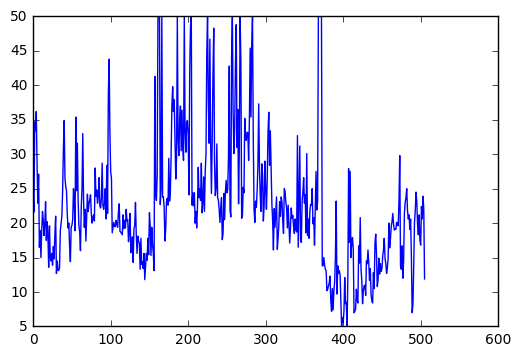

In [12]:
# boston.target.shape
plt.plot(boston.target)

In [19]:
cross_val_score(regressor, boston.data, boston.target, cv=10, verbose=2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


array([ 0.57474517,  0.64039629, -1.24363583,  0.31449845,  0.78468863,
        0.61643467,  0.30551493,  0.2607119 , -1.85878866, -0.98253715])

In [138]:
# regressor.decision_path([boston.data[0]])
boston.data.shape

(506, 13)

In [113]:
# sorted(regressor.tree_.__getstate__()['nodes'], key=lambda x:x[4])
# sum(x[-2] for x in regressor.tree_.__getstate__()['nodes'] if x[-3]<=.001)
# sum([x[-2] for x in regressor.tree_.__getstate__()['nodes'] if x[0]==-1])
# regressor.tree_.__getstate__()['values']
[x for x in regressor.tree_.__getstate__()['nodes'] if x[0]==-1]

[(-1, -1, -2, -2.0, 0.0, 2, 2.0),
 (-1, -1, -2, -2.0, 1.308695652173913, 46, 46.0),
 (-1, -1, -2, -2.0, 0.8142857142857137, 7, 7.0),
 (-1, -1, -2, -2.0, 1.7166666666666675, 6, 6.0),
 (-1, -1, -2, -2.0, 1.5750000000000004, 12, 12.0),
 (-1, -1, -2, -2.0, 0.7249999999999996, 4, 4.0),
 (-1, -1, -2, -2.0, 0.0, 2, 2.0),
 (-1, -1, -2, -2.0, 0.0, 1, 1.0),
 (-1, -1, -2, -2.0, 0.0, 1, 1.0),
 (-1, -1, -2, -2.0, 1.942857142857143, 133, 133.0),
 (-1, -1, -2, -2.0, 1.564, 25, 25.0),
 (-1, -1, -2, -2.0, 1.885714285714285, 7, 7.0),
 (-1, -1, -2, -2.0, 1.6800000000000002, 10, 10.0),
 (-1, -1, -2, -2.0, 0.5499999999999998, 2, 2.0),
 (-1, -1, -2, -2.0, 1.45, 8, 8.0),
 (-1, -1, -2, -2.0, 1.7999999999999998, 36, 36.0),
 (-1, -1, -2, -2.0, 1.905333333333333, 75, 75.0),
 (-1, -1, -2, -2.0, 0.0, 1, 1.0),
 (-1, -1, -2, -2.0, 0.875, 4, 4.0),
 (-1, -1, -2, -2.0, 1.1142857142857143, 7, 7.0),
 (-1, -1, -2, -2.0, 1.5541666666666671, 24, 24.0),
 (-1, -1, -2, -2.0, 1.9600000000000002, 15, 15.0),
 (-1, -1, -2, -2.0, 0

In [111]:
regressor.tree_.__getstate__()['nodes']

array([(1, 42, 5, 6.796999931335449, 6.53083003952569, 506, 506.0),
       (2, 27, 12, 15.0, 4.475060532687649, 413, 413.0),
       (3, 14, 12, 7.764999866485596, 3.1472656249999997, 256, 256.0),
       (4, 5, 7, 1.4849499464035034, 2.850649350649349, 77, 77.0),
       (-1, -1, -2, -2.0, 0.0, 2, 2.0),
       (6, 7, 5, 6.541999816894531, 2.2439999999999984, 75, 75.0),
       (-1, -1, -2, -2.0, 1.308695652173913, 46, 46.0),
       (8, 13, 4, 0.5260000228881836, 2.689655172413793, 29, 29.0),
       (9, 10, 12, 4.694999694824219, 2.3280000000000007, 25, 25.0),
       (-1, -1, -2, -2.0, 0.8142857142857137, 7, 7.0),
       (11, 12, 7, 4.113149642944336, 2.1333333333333333, 18, 18.0),
       (-1, -1, -2, -2.0, 1.7166666666666675, 6, 6.0),
       (-1, -1, -2, -2.0, 1.5750000000000004, 12, 12.0),
       (-1, -1, -2, -2.0, 0.7249999999999996, 4, 4.0),
       (15, 16, 7, 1.2271499633789062, 2.5949720670391074, 179, 179.0),
       (-1, -1, -2, -2.0, 0.0, 2, 2.0),
       (17, 22, 5, 6.3179998397827

In [86]:
regressor.fit(boston.data, boston.target)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=2, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [142]:
sum(boston.data[:, 5]< 6.796999931335449)

413

In [168]:
aa = np.logical_and(boston.data[:, 5]< 6.796999931335449, boston.data[:, 12]< 15)
ab = np.logical_and(aa, boston.data[:,12]<7.764999866485596)
ac = np.logical_and(ab, boston.data[:,7]>1.4849499464035034)
ad = np.logical_and(ac, boston.data[:,5]>6.541999816894531)
ae = np.logical_and(ad, boston.data[:,4]>0.5260000228881836)
sum(ae)

4

In [169]:
# (-1, -1, -2, -2.0, 1.308695652173913, 46, 46.0),
p=boston.target[ae].mean()
np.mean(abs(boston.target[ae]-p))
# plt.plot(boston.target[ad], 'b.')


0.72499999999999964

In [115]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
tree = clf.fit(iris.data, iris.target)
# tree.predict(iris.data) 


In [121]:
# [x for x in tree.tree_.__getstate__()['nodes'] if x[0]==-1]
tree.tree_.__getstate__()['nodes']

array([(1, 2, 3, 0.800000011920929, 0.6666666666666667, 150, 150.0),
       (-1, -1, -2, -2.0, 0.0, 50, 50.0),
       (3, 12, 3, 1.75, 0.5, 100, 100.0),
       (4, 7, 2, 4.949999809265137, 0.16803840877914955, 54, 54.0),
       (5, 6, 3, 1.6500000953674316, 0.04079861111111116, 48, 48.0),
       (-1, -1, -2, -2.0, 0.0, 47, 47.0), (-1, -1, -2, -2.0, 0.0, 1, 1.0),
       (8, 9, 3, 1.5499999523162842, 0.4444444444444444, 6, 6.0),
       (-1, -1, -2, -2.0, 0.0, 3, 3.0),
       (10, 11, 2, 5.449999809265137, 0.4444444444444444, 3, 3.0),
       (-1, -1, -2, -2.0, 0.0, 2, 2.0), (-1, -1, -2, -2.0, 0.0, 1, 1.0),
       (13, 16, 2, 4.850000381469727, 0.042533081285444196, 46, 46.0),
       (14, 15, 1, 3.0999999046325684, 0.4444444444444444, 3, 3.0),
       (-1, -1, -2, -2.0, 0.0, 2, 2.0), (-1, -1, -2, -2.0, 0.0, 1, 1.0),
       (-1, -1, -2, -2.0, 0.0, 43, 43.0)], 
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_s

# encode of categorical variables

In [4]:
cat_idx = {k:{b:a for a,b in enumerate(v.keys())} for k,v in cat_space.items()}
df = df.apply(lambda x: x.map(lambda y: cat_idx[x.name][y]) if 'cat' in x.name else x)
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,1,1,1,0,1,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,3.345017
2,1,0,1,1,1,1,1,1,0,0,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,3.108430
5,1,0,1,1,0,1,1,1,0,0,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,3.477857
10,0,0,1,0,1,1,1,1,0,1,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,2.973059
11,1,0,1,0,1,1,1,1,0,0,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,3.441514


In [5]:
# cf = ['cat' in x and cat_size[x]>2 for x in df.columns[:-2]]
cf = ['cat' in x for x in df.columns[:-2]]
enc=OneHotEncoder(categorical_features=cf)
fea = enc.fit_transform(df.ix[:,:-2]) # range works for letters too: df.ix[:,'b':]


In [31]:
uns = {k:cat_idx[k][max(v.items(), key=lambda x:x[1])[0]] for k,v in cat_space.items()}
# test = test.apply(lambda x: x.map(lambda y: cat_idx[x.name].get(y, -1)) if 'cat' in x.name else x)
test = test.apply(lambda x: x.map(lambda y: cat_idx[x.name].get(y, uns[x.name])) if 'cat' in x.name else x)
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,1,0,1,1,1,1,1,1,0,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,1,0,1,0,1,1,1,1,0,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,1,0,1,0,0,1,0,1,0,0,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,1,1,1,1,0,1,1,1,1,1,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,0,1,1,1,1,0,1,1,1,1,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [30]:
# test = pd.read_csv('test.csv')
# test.set_index('id', inplace=True)

In [34]:
fea

<188318x1153 sparse matrix of type '<class 'numpy.float64'>'
	with 24481115 stored elements in COOrdinate format>

In [32]:
enc.transform(test)


<125546x1153 sparse matrix of type '<class 'numpy.float64'>'
	with 16320839 stored elements in COOrdinate format>

# Baseline

In [131]:
bl = 10**df.log_loss.mean()
np.abs(df.loss-bl).mean()

1809.8369793715322